In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


In [2]:
train_data=pd.read_csv("D:\\fraudTrain.csv")
test_data=pd.read_csv("D:\\fraudTest.csv")

In [3]:
train_data.head(10).style.background_gradient(cmap='Reds')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,1/1/2019 0:04,4767270000000000.000000,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,1/1/2019 0:04,30074700000000.000000,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,1/1/2019 0:05,6011360000000000.000000,fraud_Corwin-Collins,gas_transport,71.650000,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.843200,-78.600300,6018,"Designer, multimedia",8/21/1947,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,1/1/2019 0:05,4922710000000000.000000,fraud_Herzog Ltd,misc_pos,4.270000,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.335900,-79.660700,1472,Public affairs consultant,3/7/1941,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,1/1/2019 0:06,2720830000000000.000000,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.390000,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.522000,-87.349000,151785,Pathologist,3/28/1974,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
test_data.head(10).style.background_gradient(cmap='Blues')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.550000,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.193900,-76.736100,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.930000,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.507000,-123.974300,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.370000,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.755700,-97.593600,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.370000,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.000100,-78.235700,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.540000,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.659100,-96.809400,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [5]:
data = pd.concat([train_data,test_data], axis=0)
data.head(7).style.background_gradient(cmap='Greens')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,1/1/2019 0:04,4767270000000000.000000,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,1/1/2019 0:04,30074700000000.000000,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604294 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1604294 non-null  int64  
 1   trans_date_trans_time  1604294 non-null  object 
 2   cc_num                 1604294 non-null  float64
 3   merchant               1604294 non-null  object 
 4   category               1604294 non-null  object 
 5   amt                    1604294 non-null  float64
 6   first                  1604294 non-null  object 
 7   last                   1604294 non-null  object 
 8   gender                 1604294 non-null  object 
 9   street                 1604294 non-null  object 
 10  city                   1604294 non-null  object 
 11  state                  1604294 non-null  object 
 12  zip                    1604294 non-null  int64  
 13  lat                    1604294 non-null  float64
 14  long               

In [7]:
data.reset_index(inplace=True)
data.head(10).style.background_gradient(cmap='Blues')

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,5,1/1/2019 0:04,4767270000000000.000000,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,6,1/1/2019 0:04,30074700000000.000000,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,7,1/1/2019 0:05,6011360000000000.000000,fraud_Corwin-Collins,gas_transport,71.650000,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.843200,-78.600300,6018,"Designer, multimedia",8/21/1947,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,8,1/1/2019 0:05,4922710000000000.000000,fraud_Herzog Ltd,misc_pos,4.270000,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.335900,-79.660700,1472,Public affairs consultant,3/7/1941,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,9,1/1/2019 0:06,2720830000000000.000000,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.390000,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.522000,-87.349000,151785,Pathologist,3/28/1974,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [8]:
data.isnull().sum()

index                    0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
data=data.drop(['index','Unnamed: 0'], axis=1)
data.head(10).style.background_gradient(cmap='Blues')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,1/1/2019 0:04,4767270000000000.000000,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,1/1/2019 0:04,30074700000000.000000,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,1/1/2019 0:05,6011360000000000.000000,fraud_Corwin-Collins,gas_transport,71.650000,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.843200,-78.600300,6018,"Designer, multimedia",8/21/1947,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,1/1/2019 0:05,4922710000000000.000000,fraud_Herzog Ltd,misc_pos,4.270000,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.335900,-79.660700,1472,Public affairs consultant,3/7/1941,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,1/1/2019 0:06,2720830000000000.000000,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.390000,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.522000,-87.349000,151785,Pathologist,3/28/1974,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [10]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06
mean,4.173928e+17,6.997209e+01,4.881581e+04,3.853679e+01,-9.022801e+01,8.876822e+04,1.357297e+09,3.853670e+01,-9.022818e+01,5.080740e-03
std,1.309166e+18,1.588492e+02,2.688324e+04,5.071484e+00,1.374584e+01,3.017287e+05,1.915894e+07,5.105903e+00,1.375782e+01,7.109802e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.341132e+09,3.473845e+01,-9.690064e+01,0.000000e+00
50%,3.520550e+15,4.739000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.354658e+09,3.936759e+01,-8.744167e+01,0.000000e+00
75%,4.642255e+15,8.304000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.376492e+09,4.195535e+01,-8.024331e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


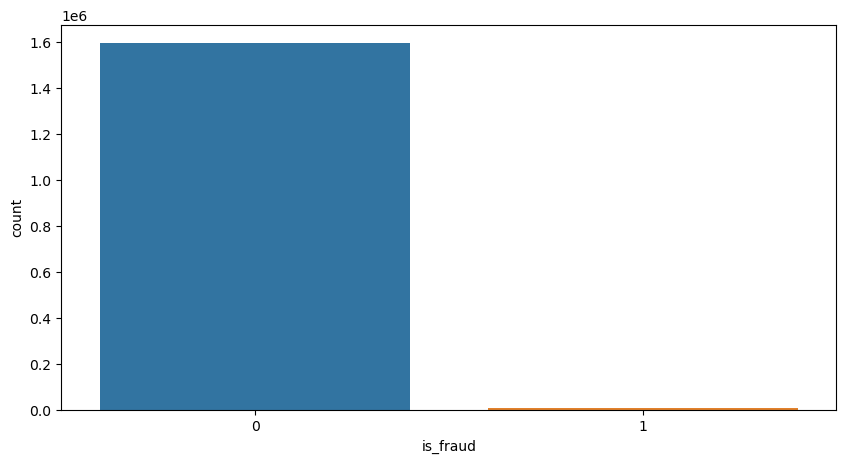

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x=data['is_fraud'])
plt.show()

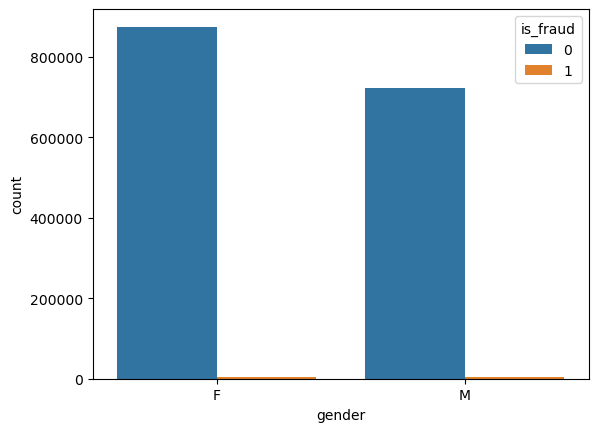

In [12]:
sns.countplot(x='gender' , hue = 'is_fraud' , data = data)
plt.show()

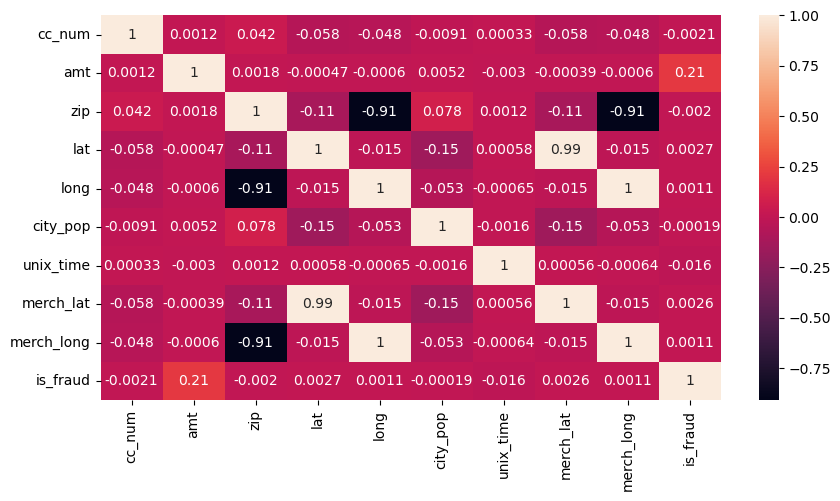

In [13]:
corrmat=data.corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corrmat , annot=True)
plt.show()

In [14]:
data.head(6).style.background_gradient(cmap='Blues')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,1/1/2019 0:04,4767270000000000.000000,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0


In [15]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
x = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

In [17]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time','merchant','category','first', 'last', 'gender', 'street', 'city','state', 
        'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x[cols] = encoder.fit_transform(x[cols])


In [18]:
x.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0.0,2.703190e+15,514.0,8.0,4.97,162.0,18.0,0.0,565.0,523.0,...,28654,36.0788,-81.1781,3495,372.0,1378.0,69589.0,1325376018,36.011293,-82.048315
1,0.0,6.304230e+11,241.0,4.0,107.23,308.0,161.0,0.0,430.0,607.0,...,99160,48.8878,-118.2105,149,431.0,1585.0,196914.0,1325376044,49.159047,-118.186462
2,0.0,3.885950e+13,390.0,0.0,220.11,114.0,385.0,1.0,599.0,465.0,...,83252,42.1808,-112.2620,4154,308.0,23.0,1012431.0,1325376051,43.150704,-112.154481
3,1.0,3.534090e+15,360.0,2.0,45.00,163.0,466.0,1.0,927.0,83.0,...,59632,46.2306,-112.1138,1939,330.0,6.0,673593.0,1325376076,47.034331,-112.561071
4,2.0,3.755340e+14,297.0,9.0,41.96,335.0,153.0,1.0,415.0,213.0,...,24433,38.4207,-79.4629,99,116.0,1353.0,1027859.0,1325376186,38.674999,-78.632459


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.56807435, -0.3167587 ,  0.85021157, ..., -1.66613687,
        -0.49460492,  0.59456086],
       [-1.56807435, -0.31882303, -0.50718943, ..., -1.66613551,
         2.08040665, -2.03217435],
       [-1.56807435, -0.31879383,  0.23366313, ..., -1.66613514,
         0.90366173, -1.59373414],
       ...,
       [ 0.73359555, -0.31423149,  0.7607126 , ...,  1.63041082,
         1.59063863, -2.1432815 ],
       [ 0.73359856, -0.3188204 , -1.33256878, ...,  1.63041129,
         1.16215107, -1.95181466],
       [ 0.73360156, -0.31563775, -1.08396054, ...,  1.63041181,
        -0.45566879, -0.49486016]])

In [20]:
Y = data[["is_fraud"]].values

In [21]:
print(x.shape)
print(Y.shape)

(1604294, 21)
(1604294, 1)


In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size=0.1 , random_state = 10)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1443864, 21)
(160430, 21)
(1443864, 1)
(160430, 1)


# LogisticRegression Model

In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,mean_absolute_error,roc_auc_score,confusion_matrix
LG = LogisticRegression()
LG = LG.fit(X_train,y_train)

In [25]:
y_pred = LG.predict(X_test)
print("The accuracy is",accuracy_score(y_pred,y_test)*100)
print("The mean_absolute_error is ",mean_absolute_error(y_test,y_pred))

The accuracy is 99.4951069002057
The mean_absolute_error is  0.005048930997943028


In [26]:
confusion_matrix(y_test,y_pred)

array([[159620,      0],
       [   810,      0]], dtype=int64)

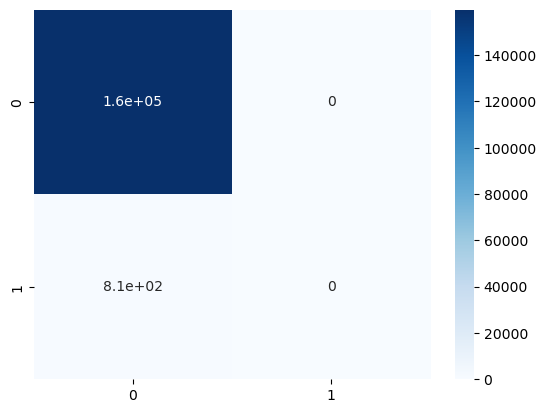

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True , cmap="Blues")
plt.show()

# DecisionTreeClassifier Model 

In [28]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(max_depth=500 , random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=42)

In [29]:
y_pred2 = dtc.predict(X_test)
print("The accuracy of DecisionTree model is",accuracy_score(y_pred2,y_test)*100)
print("The mean_absolute_error is ",mean_absolute_error(y_test,y_pred2))

The accuracy of DecisionTree model is 99.6590413264352
The mean_absolute_error is  0.0034095867356479462


In [30]:
confusion_matrix(y_test,y_pred2)

array([[159323,    297],
       [   250,    560]], dtype=int64)

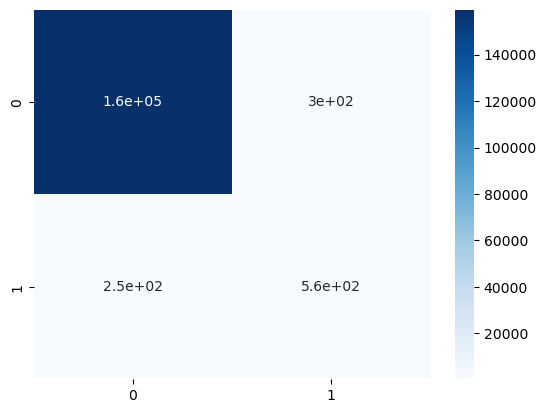

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred2) , annot=True , cmap="Blues")
plt.show()

# RandomForestClassifier Model 

In [34]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=1, max_depth=500 , random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=500, n_estimators=1, random_state=42)

In [35]:
y_pred3 = rfc.predict(X_test)
print("The accuracy of RandomForest model is",accuracy_score(y_pred3,y_test)*100)
print("The mean_absolute_error is ",mean_absolute_error(y_test,y_pred3))

The accuracy of RandomForest model is 99.6079286916412
The mean_absolute_error is  0.003920713083587857


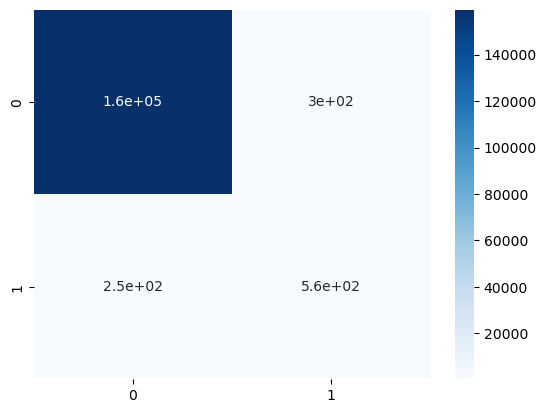

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred2) , annot=True , cmap="Blues")
plt.show()

In [37]:
print("The accuracy of RandomForest model is",accuracy_score(y_pred3,y_test)*100)
print("The accuracy of DecisionTree model is",accuracy_score(y_pred2,y_test)*100)
print("The accuracy of LogisticRegression model is",accuracy_score(y_pred,y_test)*100)

The accuracy of RandomForest model is 99.6079286916412
The accuracy of DecisionTree model is 99.6590413264352
The accuracy of LogisticRegression model is 99.4951069002057
